# Introduction
In this notebook we will finally be taking a deep dive into the data we have scraped to gain interesting insights on the powerlifting community. I am particulary interested in what meterics effect strength, particularly the bench press.

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd
import geopandas as gpd
from collections import Counter

In [18]:
import sys
sys.path.append('..\\src\\visualizations')

from visualize import plot_bar_graph, plot_pie_chart, plot_histogram

In [19]:
PROCESSED_DATA_PATH = "../data/processed/processed_lifting_data.csv"

df = pd.read_csv(PROCESSED_DATA_PATH)

df.head()

,Name,Instagram_Handle,Origin,Federation,Competition_Date,Competition_Country,Competition_City,Gender,Equipment,Age,Weight,Class,Squat,Bench,Deadlift,Total,Dots
0,Marianna Gasparyan,power_mayan,USA,WRPF,2019-04-27,USA,CA,F,Wraps,30.0,123.4,123.0,573.2,292.1,485.0,1350.3,709.96
1,Kristy Hawkins,kristy_hawkins,USA,WRPF,2022-07-29,USA,VA,F,Wraps,41.0,163.8,165.0,639.3,336.2,611.7,1587.3,704.76
2,Hunter Henderson #1,huntermhenderson,USA,WRPF,2021-04-24,USA,CA,F,Wraps,26.0,163.8,165.0,650.3,325.1,573.2,1548.7,687.63
3,Chakera Ingram,c.c_ingram,USA,USPA,2019-08-03,USA,TX,F,Wraps,24.0,177.2,181.0,639.3,374.8,595.2,1609.3,686.14
4,Stefanie Cohen,steficohen,USA,WRPF,2019-04-27,USA,CA,F,Wraps,27.0,119.9,123.0,507.0,242.5,529.1,1278.6,685.45


In [20]:
df.describe()

,Age,Weight,Class,Squat,Bench,Deadlift,Total,Dots
count,351766.000000,453800.000000,449554.000000,327802.000000,425852.000000,365786.000000,453800.000000,453800.000000
mean,28.272801,183.941611,187.430831,362.089047,243.257436,417.651622,827.343178,273.518067
std,11.316052,47.174938,45.584852,132.885636,99.749380,132.321099,434.923364,121.208654
min,0.000000,35.000000,59.000000,2.200000,8.800000,2.200000,26.400000,15.050000
25%,20.000000,148.800000,152.000000,253.500000,154.300000,308.600000,446.400000,156.717500
50%,26.000000,179.600000,183.000000,358.200000,245.000000,424.400000,804.700000,303.140000
75%,33.000000,213.200000,220.000000,451.900000,314.100000,515.000000,1179.400000,365.570000
max,96.000000,573.200000,341.000000,1102.300000,782.600000,1030.600000,2606.900000,709.960000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453800 entries, 0 to 453799
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Name                 453800 non-null  object 
 1   Instagram_Handle     9229 non-null    object 
 2   Origin               266584 non-null  object 
 3   Federation           453800 non-null  object 
 4   Competition_Date     453800 non-null  object 
 5   Competition_Country  453800 non-null  object 
 6   Competition_City     309166 non-null  object 
 7   Gender               453800 non-null  object 
 8   Equipment            453800 non-null  object 
 9   Age                  351766 non-null  float64
 10  Weight               453800 non-null  float64
 11  Class                449554 non-null  float64
 12  Squat                327802 non-null  float64
 13  Bench                425852 non-null  float64
 14  Deadlift             365786 non-null  float64
 15  Total            

### Number of meets by country

In [22]:
print(f'Over {len(df["Competition_Country"].unique())} countries host powerlifting competitons')

Over 111 countries host powerlifting competitons


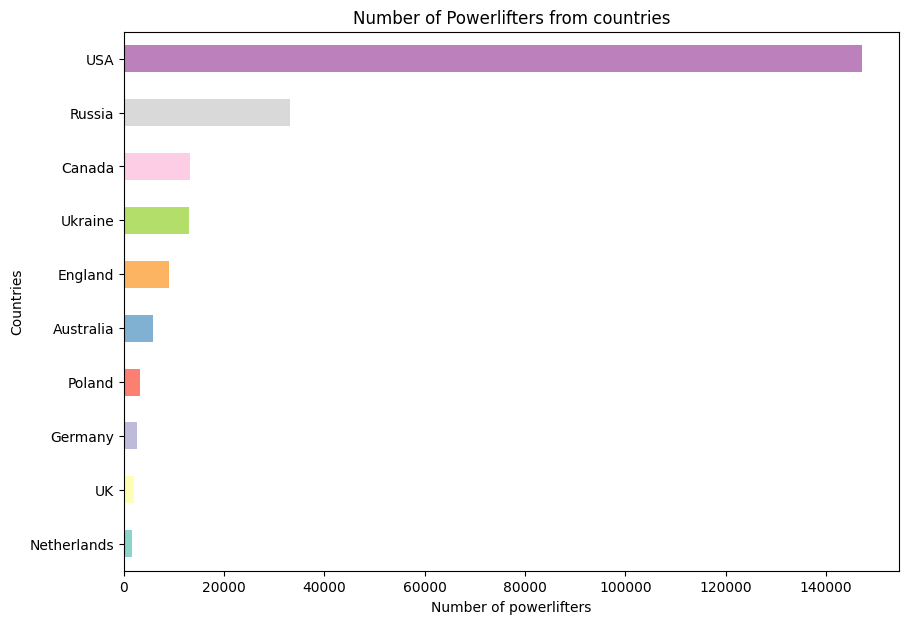

Netherlands      1558
UK               1933
Germany          2699
Poland           3219
Australia        5820
England          9047
Ukraine         12883
Canada          13216
Russia          33205
USA            147198
Name: Origin, dtype: int64

In [23]:
origin_counts = df["Origin"].value_counts()[:10].sort_values(ascending=True)

plot_bar_graph(
    data=origin_counts,
    title="Number of Powerlifters from countries", 
    xlabel="Number of powerlifters", 
    ylabel="Countries", 
    kind='barh'
)

origin_counts

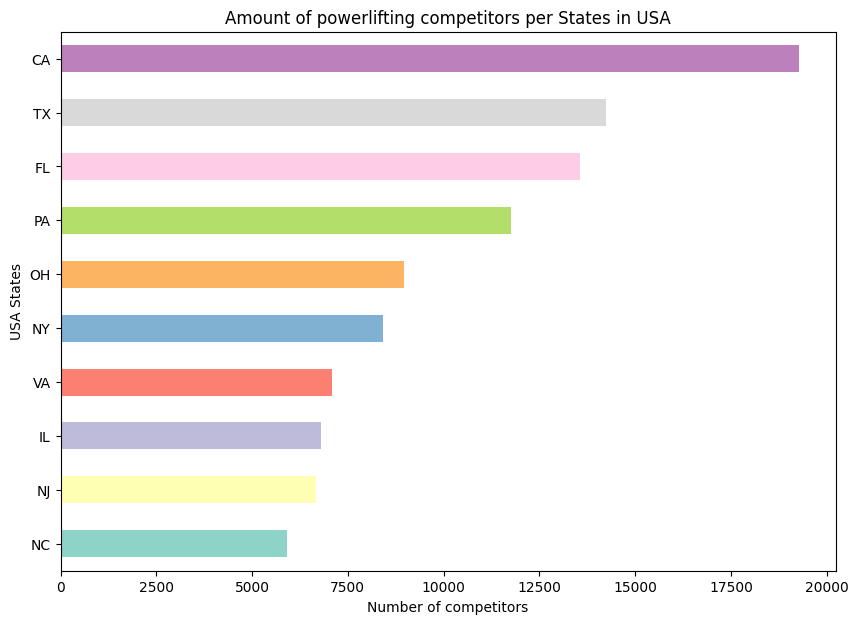

NC     5909
NJ     6675
IL     6786
VA     7078
NY     8428
OH     8961
PA    11758
FL    13558
TX    14231
CA    19266
Name: Competition_City, dtype: int64

In [24]:
state_competitions = df.loc[df["Competition_Country"] == "USA"]["Competition_City"].value_counts()[:10].sort_values(ascending=True)

plot_bar_graph(
    data=state_competitions,
    title="Amount of powerlifting competitors per States in USA", 
    xlabel="Number of competitors", 
    ylabel="USA States", 
    kind='barh'
)

state_competitions

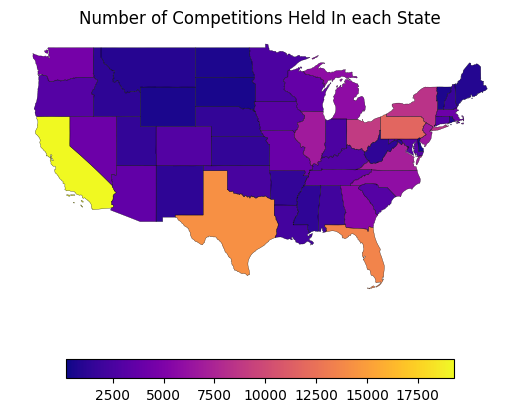

In [25]:
USA_city_df = df.loc[df["Competition_Country"] == "USA"]["Competition_City"].value_counts()
USA_city_df = USA_city_df.to_frame().reset_index()
USA_city_df.columns = ["Competition_City", "Count"]
states = gpd.read_file("C:\\Users\\pknad\\OneDrive\\Documents\\Machine_Learning\\PowerLifting\\data\\assets\\cb_2018_us_state_20m.shp")
type(states)

shape = pd.merge(
    left = states,
    right = USA_city_df, 
    left_on="STUSPS",
    right_on="Competition_City",
    how='left'
)

shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

ax = shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10,5))
shape.plot(ax=ax, column='Count', legend=True, cmap='plasma', legend_kwds = {'shrink':0.5,'orientation':'horizontal'})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'left', 'bottom', 'top']:
    ax.spines[edge].set_visible(False)

ax.set_title("Number of Competitions Held In each State", size=12)

plt.show()

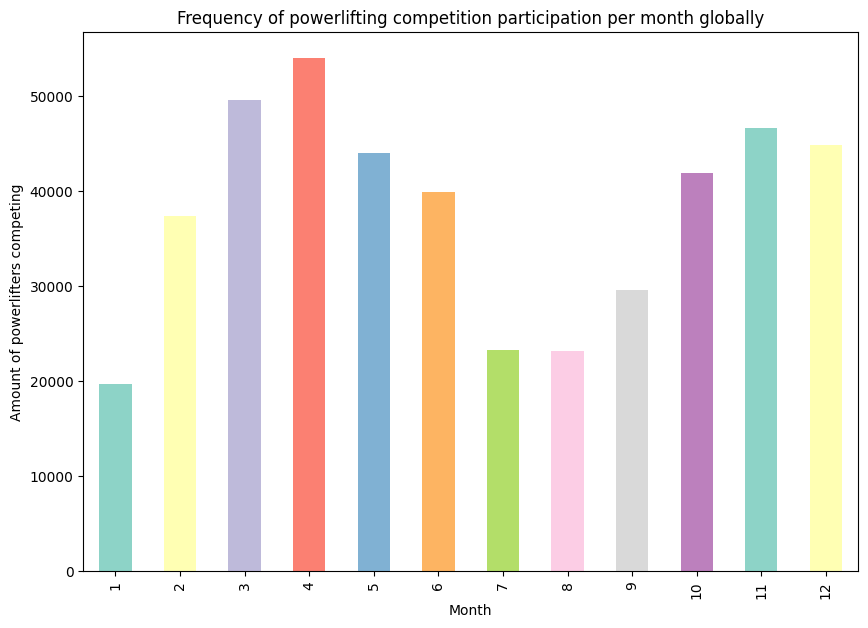

In [26]:
month_counts = pd.to_datetime(df['Competition_Date']).dt.month.value_counts().sort_index()

plot_bar_graph(
    data=month_counts,
    title="Frequency of powerlifting competition participation per month globally", 
    xlabel="Month", 
    ylabel="Amount of powerlifters competing", 
    kind='bar'
)

C:\Users\pknad\AppData\Local\Temp\ipykernel_15508\3185185907.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  year_counts = pd.to_datetime(df['Competition_Date']).dt.year.value_counts().sort_values(ascending=False)[:12].sort_index()


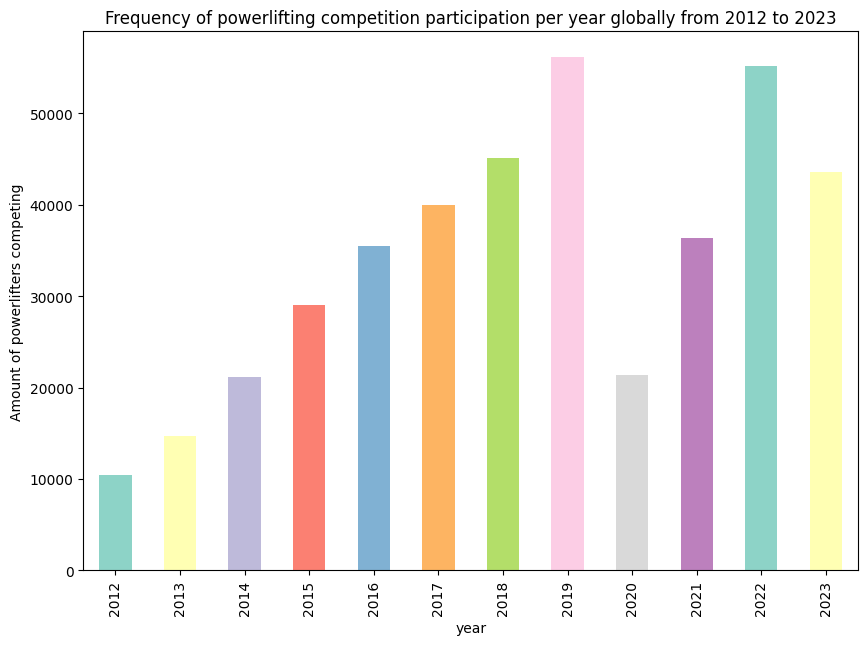

In [27]:
year_counts = pd.to_datetime(df['Competition_Date']).dt.year.value_counts().sort_values(ascending=False)[:12].sort_index()

plot_bar_graph(
    data=year_counts,
    title="Frequency of powerlifting competition participation per year globally from 2012 to 2023", 
    xlabel="year", 
    ylabel="Amount of powerlifters competing", 
    kind='bar'
)

we can see COVID drastically reduced the number of participants in 2020

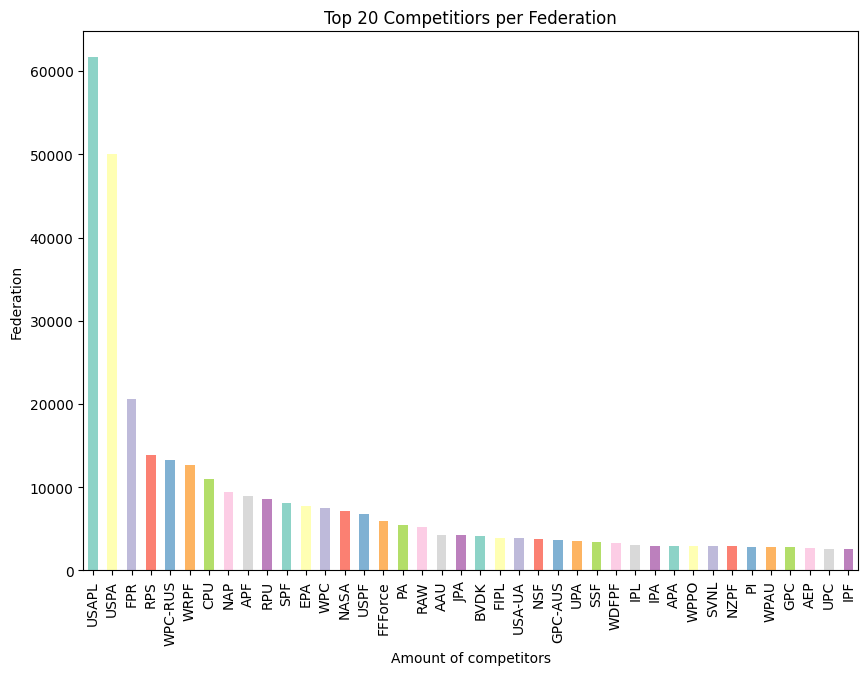

In [28]:
# Look at distribution of federation
federation_counts = df["Federation"].value_counts()[:40]
plot_bar_graph(
    data=federation_counts,
    title="Top 20 Competitiors per Federation", 
    xlabel="Amount of competitors", 
    ylabel="Federation", 
    kind='bar'
)

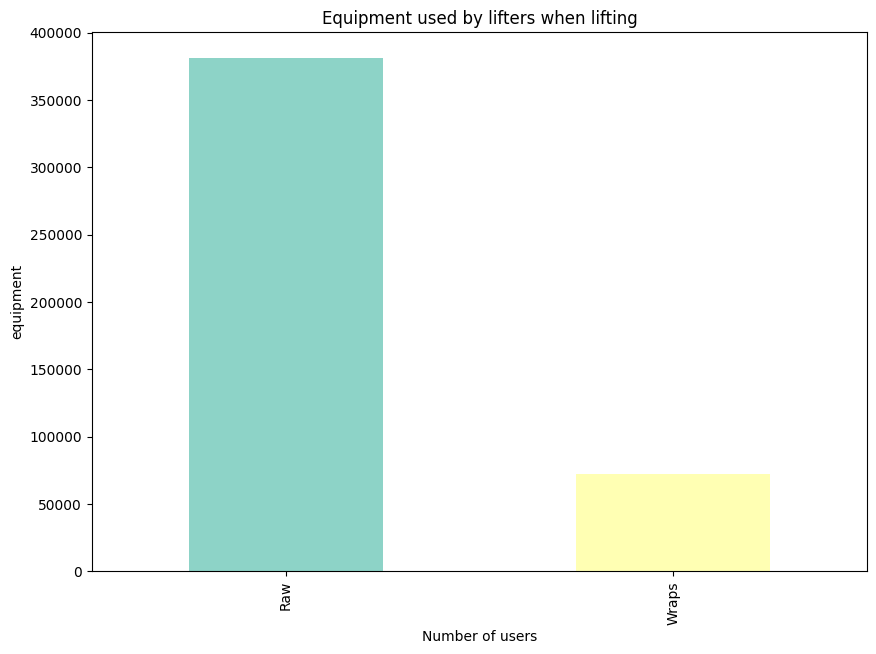

In [29]:
# Look at distribution of Equipment
equipment_counts = df["Equipment"].value_counts()

plot_bar_graph(
    data=equipment_counts,
    title="Equipment used by lifters when lifting", 
    xlabel="Number of users", 
    ylabel="equipment", 
    kind="bar"
)


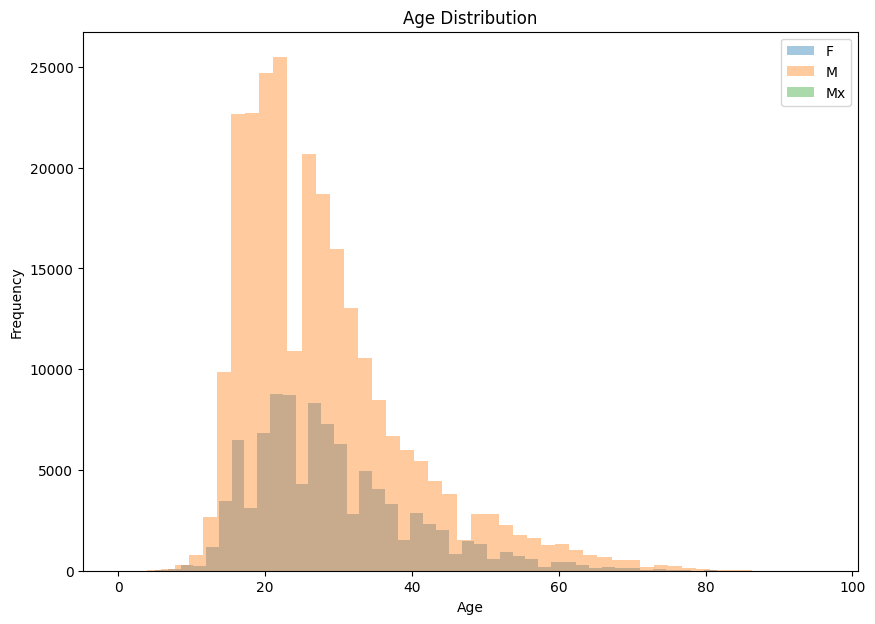

In [30]:
# look at distribution of Age
plot_histogram(
    data=df,
    title="Age Distribution",
    bins=50,
    xlabel="Age",
    ylabel="Frequency",
    hue="Gender",
    column="Age",
)


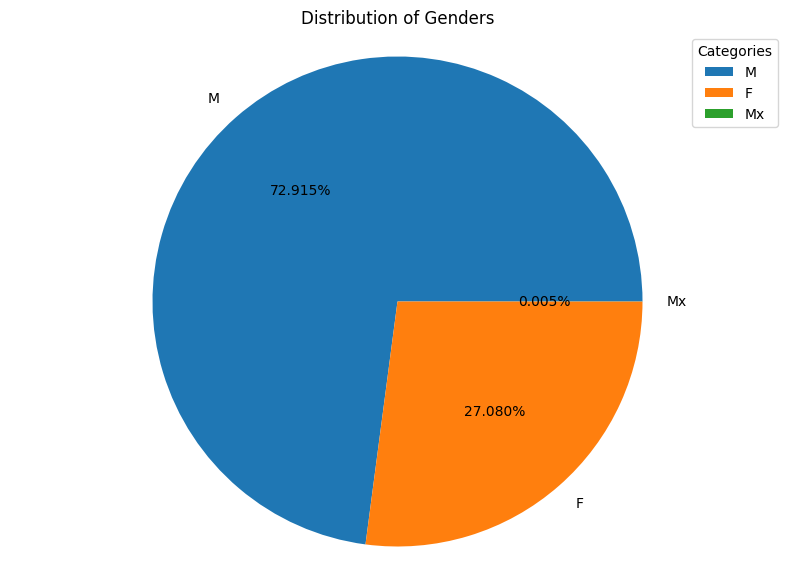

In [31]:
# Look at distribution of Gender
gender_counts = df["Gender"].value_counts()

plot_pie_chart(
    data=gender_counts,
    title="Distribution of Genders",
    digit_format="%1.3f%%"
)


The sport seems to be heavily male dominated

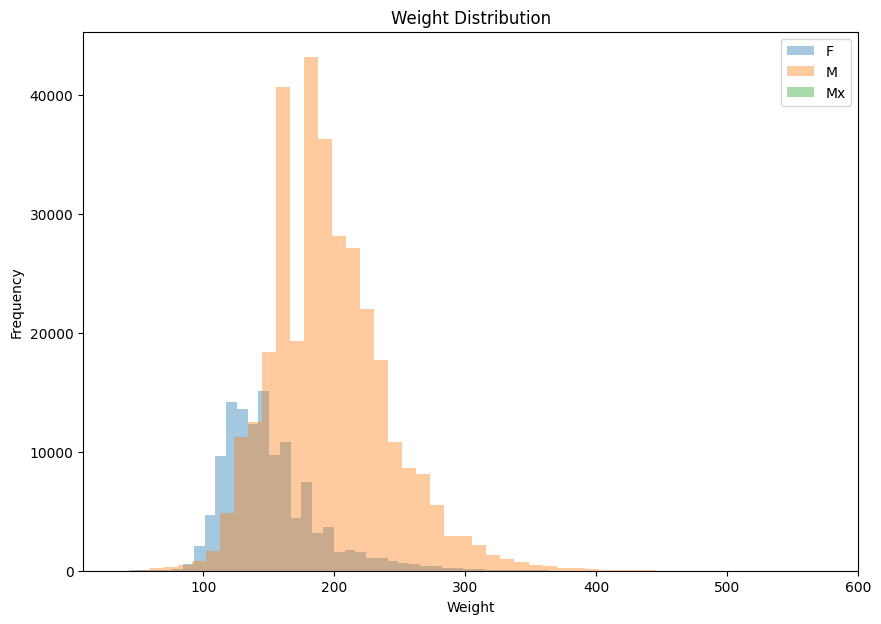

In [32]:
# Look at distribution of weight
plot_histogram(
    data=df,
    title="Weight Distribution",
    bins=50,
    xlabel="Weight",
    ylabel="Frequency",
    hue="Gender",
    column="Weight",
)

TODO: Look at strength relations  
    How is strength related to:  
        Age  
        Federation   
        Gender  
        Weight  
        Origin  
        Equipment  
    Look at how strength has changed over the years  
    Look at what times of month are people the strongest  